In [1]:
# 导入相对应的数据库
import keras.models
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


In [29]:
# 导入数据mnist数据集，（前6w train、后1w test）
mnist = tf.keras.datasets.mnist.load_data()

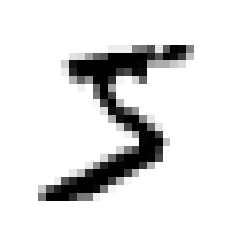

训练集第一张图片对应的结果是：
5


In [4]:
# 查看第一张图片的数据例子、以及对应标签值
some_digit_image=mnist[0][0][0]
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()
print('训练集第一张图片对应的结果是：')
print(mnist[0][1][0])

许多机器学习设计每个训练实例的成千上万甚至数百万的特征，所有这些特征不仅让训练变得缓慢，还会让找到好的解决方案变得更加的困难，这个问题通常被称为维度的诅咒，比如在MNIST数据集中，图像边界上的像素几乎都是白色，因此可以从训练集中完全删除这些像素而不会丢失太多信息
两种主要的数据降维方法：
* 投影
* 流形学习

三种主要的数据降维技术：
* PCA
* kernal PCA
* LLE

In [30]:
# 划分训练集和测试集，并作出归一化来提高神经网络对于数据的吸收
(x_train, y_train), (x_test, y_test) = mnist
x_train, x_test = x_train / 255, x_test / 255

## 分析PCA和没有PCA处理的速度和精度

In [49]:
# 利用keras快速搭建网络
model=keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [38]:
from sklearn.decomposition import PCA

x_train_pca=x_train.reshape(60000,784)
x_test_pca=x_test.reshape(10000,784)



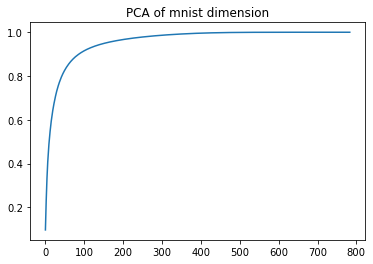

In [44]:
import numpy as np
pca=PCA(n_components=x_train_pca.shape[1])
pca.fit(x_train_pca)

# 查看各主成分能够解释原始数据集的方差的比例，可以看出主成分的重要程度，帮助选择最好的维度，可以取0.95分位数
plt.plot([i for i in range(x_train_pca.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(x_train_pca.shape[1])])
plt.title('PCA of mnist dimension')
plt.show()

In [45]:
pca=PCA(0.95)
pca.fit(x_train_pca)

x_train_reduction = pca.transform(x_train_pca)
x_test_reduction = pca.transform(x_test_pca)

In [50]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train_reduction, y_train, epochs = 15, validation_data = (x_test_reduction, y_test), validation_freq = 1)

Epoch 1/15
  43/1875 [..............................] - ETA: 6s - loss: 2.3429 - accuracy: 0.1153

2021-11-08 20:56:52.640014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 1.0866 - accuracy: 0.6930

2021-11-08 20:56:59.229057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 1.0864 - accuracy: 0.6931 - val_loss: 0.2847 - val_accuracy: 0.9215
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2772 - accuracy: 0.9189 - val_loss: 0.2070 - val_accuracy: 0.9412
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2059 - accuracy: 0.9397 - val_loss: 0.1706 - val_accuracy: 0.9495
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1637 - accuracy: 0.9524 - val_loss: 0.1486 - val_accuracy: 0.9552
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1388 - accuracy: 0.9606 - val_loss: 0.1327 - val_accuracy: 0.9603
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1264 - accuracy: 0.9645 - val_loss: 0.1198 - val_accuracy: 0.9642
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1141 - accuracy: 0.9673 - val_loss: 0.1101 - val_accuracy: 0.9662
Epo

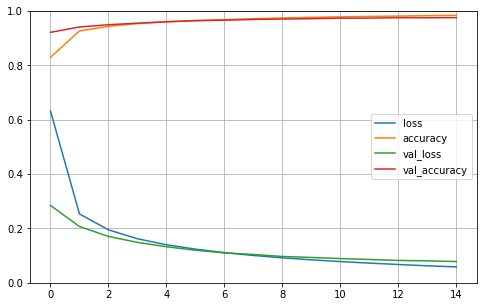

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_4 (ModuleWrap (None, 154)               0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 300)               46500     
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 100)               30100     
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 10)                1010      
Total params: 77,610
Trainable params: 77,610
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
# 输出训练过程中的训练集、测试集中accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
print(model.summary())

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_reduction, y_train)
print(knn_clf.score(x_test_reduction, y_test))

0.9712


Epoch 1/15
  38/1875 [..............................] - ETA: 7s - loss: 2.2589 - accuracy: 0.1677

2021-11-08 21:00:23.996944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1868/1875 [============================>.] - ETA: 0s - loss: 0.9999 - accuracy: 0.7397

2021-11-08 21:00:31.233989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.9982 - accuracy: 0.7401 - val_loss: 0.3001 - val_accuracy: 0.9162
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2988 - accuracy: 0.9149 - val_loss: 0.2371 - val_accuracy: 0.9318
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2387 - accuracy: 0.9319 - val_loss: 0.1996 - val_accuracy: 0.9415
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1980 - accuracy: 0.9432 - val_loss: 0.1762 - val_accuracy: 0.9491
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1757 - accuracy: 0.9500 - val_loss: 0.1588 - val_accuracy: 0.9537
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1532 - accuracy: 0.9560 - val_loss: 0.1427 - val_accuracy: 0.9573
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1380 - accuracy: 0.9597 - val_loss: 0.1319 - val_accuracy: 0.9610
Epo

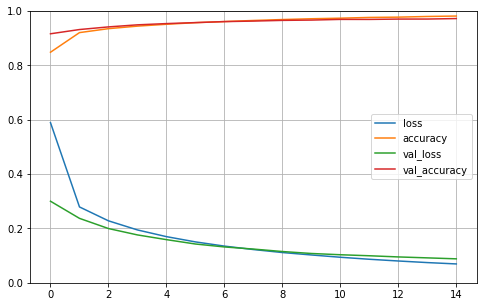

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_8 (ModuleWrap (None, 784)               0         
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 300)               235500    
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 100)               30100     
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
# 利用keras快速搭建网络
model=keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs = 15, validation_data = (x_test, y_test), validation_freq = 1)

# 输出训练过程中的训练集、测试集中accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
print(model.summary())

## 依旧针对网络结果来测试对应的分类属性

In [66]:
y_train_pred=model.predict_classes(x_train)
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_train,y_train_pred)

/Users/chenxia/miniforge3/envs/datastudy/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


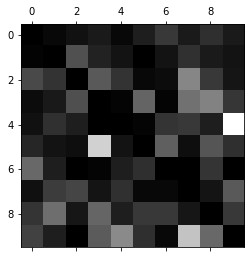

In [69]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

### 由上图可以看出在深度学习中，数字4和数字9、以及数字3和数字5容易发生混淆

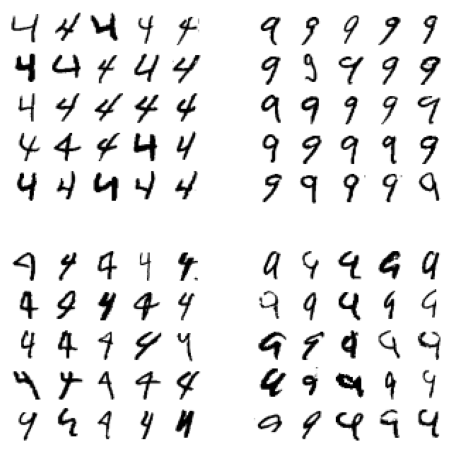

In [82]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
def mnist_confusion(num1,num2):
    x_aa=x_train[(y_train==num1)&(y_train_pred==num1)]
    x_bb=x_train[(y_train==num2)&(y_train_pred==num2)]
    x_ab=x_train[(y_train==num1)&(y_train_pred==num2)]
    x_ba=x_train[(y_train==num2)&(y_train_pred==num1)]
    plt.figure(figsize=(8,8))
    plt.subplot(221);plot_digits(x_aa[:25],images_per_row=5)
    plt.subplot(222);plot_digits(x_bb[:25],images_per_row=5)
    plt.subplot(223);plot_digits(x_ab[:25],images_per_row=5)
    plt.subplot(224);plot_digits(x_ba[:25],images_per_row=5)
    plt.show()
    
mnist_confusion(4,9)

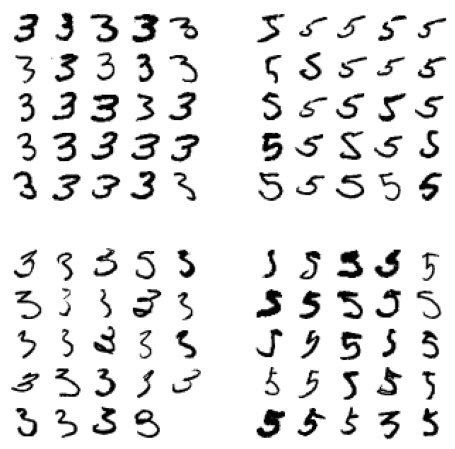

In [83]:
mnist_confusion(3,5)

可以看出混淆的矩阵（均为下面两个）中错误比较明显，原因在与神经网络得到的是针对像素值的加权模型，因此对于相邻的像素值如果模式类似的话，神经网络
模型会非常容易混淆，比如4和9的差距从像素的角度来理解则是是否会开闭，那么如果像素值产生移位或者旋转，神经网络会非常容易的将两者混淆

### 尝试使用卷积神经网络CNN来对mnist进行识别，最简单的输入层、卷积层、池化层、卷积层、池化层、全连接层等

In [107]:
model_cnn=keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax'),
])



In [108]:
print(model_cnn.summary())



Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 7, 7, 256)       

Epoch 1/15


2021-11-08 23:20:19.874012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 1.8198 - accuracy: 0.3458

2021-11-08 23:21:01.469219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 46s 23ms/step - loss: 1.8188 - accuracy: 0.3462 - val_loss: 0.1501 - val_accuracy: 0.9570
Epoch 2/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3123 - accuracy: 0.9093 - val_loss: 0.0813 - val_accuracy: 0.9757
Epoch 3/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1869 - accuracy: 0.9505 - val_loss: 0.0646 - val_accuracy: 0.9794
Epoch 4/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1407 - accuracy: 0.9615 - val_loss: 0.0548 - val_accuracy: 0.9828
Epoch 5/15
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1120 - accuracy: 0.9705 - val_loss: 0.0402 - val_accuracy: 0.9879
Epoch 6/15
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0957 - accuracy: 0.9767 - val_loss: 0.0405 - val_accuracy: 0.9884
Epoch 7/15
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0808 - accuracy: 0.9801 - val_loss: 0.0360 - val_accura

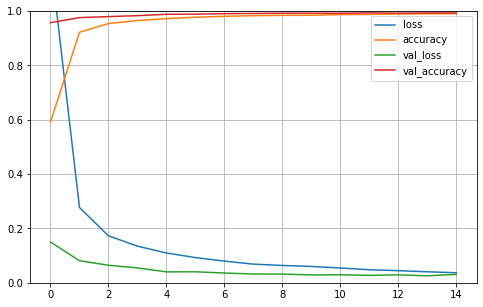

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 7, 7, 256)       

In [110]:
x_train_cnn = x_train.reshape((60000, 28, 28, 1))
x_test_cnn = x_test.reshape((10000, 28, 28, 1))
model_cnn.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model_cnn.fit(x_train_cnn, y_train, epochs = 15, validation_data = (x_test_cnn, y_test))

# 输出训练过程中的训练集、测试集中accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
print(model_cnn.summary())

In [120]:
pca=PCA(n_components=169)
pca.fit(x_train_pca)

x_train_reduction = pca.transform(x_train_pca)
x_test_reduction = pca.transform(x_test_pca)

x_train_nn_pca=x_train_reduction.reshape(60000,13,13,1)
x_test_nn_pca=x_test_reduction.reshape(10000,13,13,1)


model_cnn_pca=keras.models.Sequential([
    keras.layers.Conv2D(64,7,activation='relu',padding='same',input_shape=[13,13,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.Conv2D(128,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    keras.layers.Conv2D(256,3,activation='relu',padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax'),
])

print(model_cnn_pca.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 13, 13, 64)        3200      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 6, 6, 128)         147584    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 256)       

Epoch 1/15


2021-11-09 12:49:47.548997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 2.2341 - accuracy: 0.1770

2021-11-09 12:50:05.151212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 20s 10ms/step - loss: 2.2334 - accuracy: 0.1773 - val_loss: 0.9692 - val_accuracy: 0.7353
Epoch 2/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9934 - accuracy: 0.6635 - val_loss: 0.3411 - val_accuracy: 0.8896
Epoch 3/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4644 - accuracy: 0.8615 - val_loss: 0.2156 - val_accuracy: 0.9357
Epoch 4/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3222 - accuracy: 0.9114 - val_loss: 0.1708 - val_accuracy: 0.9504
Epoch 5/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2497 - accuracy: 0.9340 - val_loss: 0.1472 - val_accuracy: 0.9562
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2052 - accuracy: 0.9464 - val_loss: 0.1439 - val_accuracy: 0.9591
Epoch 7/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1740 - accuracy: 0.9554 - val_loss: 0.1328 - val_accura

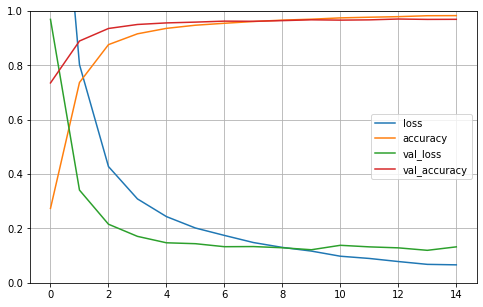

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_8 (ModuleWrap (None, 784)               0         
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 300)               235500    
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 100)               30100     
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [122]:
model_cnn_pca.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history=model_cnn_pca.fit(x_train_nn_pca, y_train, epochs = 15, validation_data = (x_test_nn_pca, y_test), validation_freq = 1)



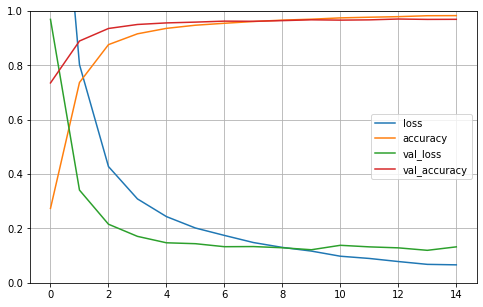

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 13, 13, 64)        3200      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 6, 6, 128)         147584    
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 3, 3, 256)       

In [123]:
# 输出训练过程中的训练集、测试集中accuracy
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
print(model_cnn_pca.summary())

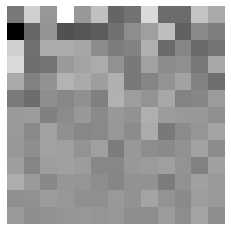

In [134]:
# 查看第一张图片的数据例子、以及对应标签值
some_digit_image=x_train_nn_pca[0].reshape(13,13)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()